# Lab 1 - New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis

# Model Creation and Understanding

We are exploring both Logistic Regression and Random Forest Classification to determine if crimes classify is either "Violent" or "Non-Violent". 

Accuracy and specificity will be our main benchmarks of model effectiveness as we are trying to correctly minimize our false positive rate of classifying a crime to be violent. Model effectiveness will be measured by an accuracy threshold of at least 70%, as well as, a specificity rate of 70%.

### Assumptions

In logistic regression, there are a few assumptions that must be considered.  
 - For this evaluation, we determined that we are solving for a binary classification of 'Violent' and 'Non-Violent' crimes.  In binary classification, the dependent variable must be binary; we must only have two outcomes. 
 - The second assumption to consider is independence.  The dataset may not use a method such as repeated measures.  Our dataset, as far as we understand, has measured unique, independent crime activities.
 - The third assumption or requirement is that the selected data must have little or no multicollinearity among the variables.  During our Exploratory Data Analysis, we did identify that we had correlation between months and temperature data.  We did not include the weather data in this modeling.  
 - A final requirement for logistic regression is a 'large' sample size.  At an original dataset of 1.4M observations, we comfortably met this metric.

### Binary Variable Classification Curation

There were 64 unique possibilities of crimes that were recroded in our dataset. Initially, we explored different avenues of multi-class classification, but those techniques added higher complexity and class imbalances. Ultimately, we managed to classify all 64 different types of crimes into two main subgroups: Violent vs Non-Violent. 

Our team has leveraged https://www1.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page as a benchmark to accurately classify each of our unique crimes into the binary subgroup descrbed above to continue on with our analysis. 

### Parameter Tuning

# Model 1 - Logistic Regression Model

### Model Description

The first activity that had to occur was data manipulation, to dummy encode our categorical variables.  With a ratio of roughly 30/70 split on violent versus non-violent incidents, we also upsampled our dataset to balance it.

### Setting Up the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
crime = pd.read_csv('Training_and_Test_Set.csv') # read in the csv %%file

In [3]:
crime.dtypes #ensuring the data read in correctly

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
y                      int64
dtype: object

In [4]:
crime.head()

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


In [5]:
#Value Counts by Crime Type - note the ration of Violent [0] vs Non-Violent [1]?
crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [6]:
#dropping any remaining NANs
crime = crime.dropna() 

In [7]:
#confirming that we don't have any NaN's
crime.isnull().values.any()

False

In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528873 entries, 0 to 528872
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   JURIS_DESC         528873 non-null  object 
 1   BORO_NM            528873 non-null  object 
 2   ADDR_PCT_CD        528873 non-null  float64
 3   LOC_OF_OCCUR_DESC  528873 non-null  object 
 4   PREM_TYP_DESC      528873 non-null  object 
 5   Day_Name           528873 non-null  object 
 6   Duration           528873 non-null  float64
 7   Duration_to_PD     528873 non-null  float64
 8   Month              528873 non-null  object 
 9   Day                528873 non-null  float64
 10  Year               528873 non-null  float64
 11  Duration_lbl       528873 non-null  object 
 12  Season             528873 non-null  object 
 13  Daytime            528873 non-null  object 
 14  GeoCell            528873 non-null  float64
 15  GeoCell_X          528873 non-null  float64
 16  Ge

In [9]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528873 entries, 0 to 528872
Columns: 225 entries, JURIS_DESC to Daytime_Night
dtypes: float64(8), int64(1), object(9), uint8(207)
memory usage: 181.1+ MB


In [11]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

In [12]:
#confirming what was changed
pd.set_option('display.max_rows', 300)
crime.dtypes

Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                                       float64
GeoCell_X                                     float64
GeoCell_Y                                     float64
y                                               int64
JURIS_DESC_AMTRACK                              uint8
JURIS_DESC_DEPT OF CORRECTIONS                  uint8
JURIS_DESC_HEALTH & HOSP CORP                   uint8
JURIS_DESC_LONG ISLAND RAILRD                   uint8
JURIS_DESC_METRO NORTH                          uint8
JURIS_DESC_N.Y. HOUSING POLICE                  uint8
JURIS_DESC_N.Y. POLICE DEPT                     uint8
JURIS_DESC_N.Y. STATE PARKS                     uint8
JURIS_DESC_N.Y. STATE POLICE                    uint8
JURIS_DESC_N.Y. TRANSIT POLICE                  uint8
JURIS_DESC_NEW YORK CITY SHE

### Balancing the Dataset

As noted previously, the dataset was not balanced.  Based on iterative testing, we determined that we would balance the data before fitting to optimize the results.

In [13]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in crime:
    y = crime['y'].values # get the labels we want
    del crime['y'] # get rid of the class label
    X = crime.values # use everything else to predict!

In [14]:
from imblearn.over_sampling import SMOTE
#transform (balance) the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

### Parameters

### Logistic Regression Model: Iteration 1

In [15]:
#Creating the object to do 3 fold cross validation.  We have defined an 80/20 split on the data as well
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [16]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# Creating the Logistic Regression Object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

In [17]:
iter_num=0

In [18]:
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logistic regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.7186075793449848
confusion matrix
 [[45986 27172]
 [13949 59027]]
====Iteration 1  ====
accuracy 0.7193466270683072
confusion matrix
 [[46221 27127]
 [13886 58900]]
====Iteration 2  ====
accuracy 0.7190729056892988
confusion matrix
 [[45952 26887]
 [14166 59129]]


In [19]:
#printing just accuracies
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.72238493 0.72086578 0.72009252]


In [20]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

In [21]:
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = crime.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
# by running the data model this way, we have not yet scaled the data - that step is next

Duration has weight of -0.35917563225859384
Duration_to_PD has weight of -0.00017360665587026183
Day has weight of 0.00028685259109663
Year has weight of 0.0011265934118900572
GeoCell has weight of 0.04740902219803416
GeoCell_X has weight of -0.035805924023633987
GeoCell_Y has weight of -0.4591963435146753
JURIS_DESC_AMTRACK has weight of 0.2642909971705286
JURIS_DESC_DEPT OF CORRECTIONS has weight of -0.06480897515383675
JURIS_DESC_HEALTH & HOSP CORP has weight of 0.6804854541452097
JURIS_DESC_LONG ISLAND RAILRD has weight of -0.2910599785249865
JURIS_DESC_METRO NORTH has weight of 0.62158229260959
JURIS_DESC_N.Y. HOUSING POLICE has weight of 0.10309193801316034
JURIS_DESC_N.Y. POLICE DEPT has weight of 0.208275065056534
JURIS_DESC_N.Y. STATE PARKS has weight of -0.10021400154449037
JURIS_DESC_N.Y. STATE POLICE has weight of -0.3030951112649326
JURIS_DESC_N.Y. TRANSIT POLICE has weight of -0.787094215566247
JURIS_DESC_NEW YORK CITY SHERIFF OFFICE has weight of 0.3129557675596584
JURIS

In [22]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.7193192549304064
[[45971 26868]
 [14149 59146]]


In [23]:
# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Duration has weight of -1.7195881367229278
PREM_TYP_DESC_DEPARTMENT STORE has weight of -0.41290479142796704
Duration_lbl_Short has weight of -0.3825597028039069
PREM_TYP_DESC_CHAIN STORE has weight of -0.3253698647905225
PREM_TYP_DESC_DRUG STORE has weight of -0.23705705531448132
PREM_TYP_DESC_CLOTHING/BOUTIQUE has weight of -0.23526101590618234
LOC_OF_OCCUR_DESC_OPPOSITE OF has weight of -0.1639934590946728
LOC_OF_OCCUR_DESC_REAR OF has weight of -0.15784600859016729
PREM_TYP_DESC_FOOD SUPERMARKET has weight of -0.1445907211380509
PREM_TYP_DESC_GYM/FITNESS FACILITY has weight of -0.10583807454703416
PREM_TYP_DESC_COMMERCIAL BUILDING has weight of -0.10405395327355062
PREM_TYP_DESC_BANK has weight of -0.10294593824787816
PREM_TYP_DESC_ATM has weight of -0.09352408770965889
PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE) has weight of -0.06954172026656716
PREM_TYP_DESC_TELECOMM. STORE has weight of -0.06904602361583512
PREM_TYP_DESC_STORE UNCLASSIFIED has weight of -0.06854145068278839
PREM

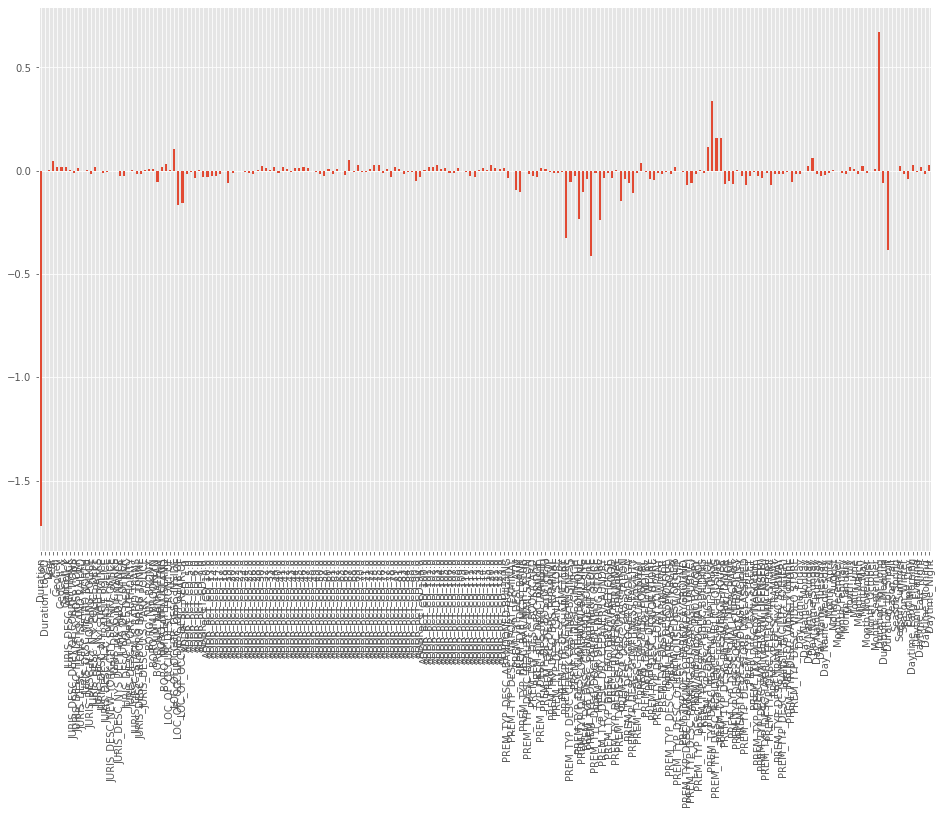

In [24]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=crime.columns)
weights.plot(kind='bar', figsize = (16,10))
plt.show()

In [25]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69     72839
           1       0.69      0.81      0.74     73295

    accuracy                           0.72    146134
   macro avg       0.73      0.72      0.72    146134
weighted avg       0.73      0.72      0.72    146134



In [26]:
zip_vars #this lists out the weights in a slightly more readable list

[(array([-1.71958814]), 'Duration'),
 (array([-0.41290479]), 'PREM_TYP_DESC_DEPARTMENT STORE'),
 (array([-0.3825597]), 'Duration_lbl_Short'),
 (array([-0.32536986]), 'PREM_TYP_DESC_CHAIN STORE'),
 (array([-0.23705706]), 'PREM_TYP_DESC_DRUG STORE'),
 (array([-0.23526102]), 'PREM_TYP_DESC_CLOTHING/BOUTIQUE'),
 (array([-0.16399346]), 'LOC_OF_OCCUR_DESC_OPPOSITE OF'),
 (array([-0.15784601]), 'LOC_OF_OCCUR_DESC_REAR OF'),
 (array([-0.14459072]), 'PREM_TYP_DESC_FOOD SUPERMARKET'),
 (array([-0.10583807]), 'PREM_TYP_DESC_GYM/FITNESS FACILITY'),
 (array([-0.10405395]), 'PREM_TYP_DESC_COMMERCIAL BUILDING'),
 (array([-0.10294594]), 'PREM_TYP_DESC_BANK'),
 (array([-0.09352409]), 'PREM_TYP_DESC_ATM'),
 (array([-0.06954172]), 'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)'),
 (array([-0.06904602]), 'PREM_TYP_DESC_TELECOMM. STORE'),
 (array([-0.06854145]), 'PREM_TYP_DESC_STORE UNCLASSIFIED'),
 (array([-0.06420881]), 'PREM_TYP_DESC_RESTAURANT/DINER'),
 (array([-0.06379496]), 'PREM_TYP_DESC_SMALL MERCHANT

### Logistic Regression Model: Iteration 2

For the next iteration of the model evaluation, we are using a subset of variables based on an importance threshold set at |.03| from the initial model created

In [27]:
import pandas as pd
import numpy as np

In [28]:
crime = pd.read_csv('Training_and_Test_Set.csv') # read in the csv %%file

In [29]:
crime.dtypes #data check that it read in correctly

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
y                      int64
dtype: object

In [30]:
#Value Counts by Crime Type
crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [31]:
#dropping any remaining NANs
crime = crime.dropna() 

In [32]:
crime.isnull().values.any()

False

In [33]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [34]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

In [35]:
#Now we want to pare down the variables - cutting off at  |.03|%
X_sm = crime[[ 'PREM_TYP_DESC_HIGHWAY/PARKWAY', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'GeoCell_X', 'Year',
          'ADDR_PCT_CD_66.0', 'Day_Name_Saturday', 'LOC_OF_OCCUR_DESC_FRONT OF', 'PREM_TYP_DESC_PUBLIC BUILDING', 
          'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 
          'PREM_TYP_DESC_PUBLIC SCHOOL', 'Month_September', 'Duration', 'PREM_TYP_DESC_CONSTRUCTION SITE',
          'Duration_lbl_Medium', 'PREM_TYP_DESC_CEMETERY', 'PREM_TYP_DESC_CHURCH', 'PREM_TYP_DESC_DOCTOR/DENTIST OFFICE',
          'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'PREM_TYP_DESC_FERRY/FERRY TERMINAL',
          'PREM_TYP_DESC_GROCERY/BODEGA', 'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_ATM', 'PREM_TYP_DESC_AIRPORT TERMINAL',  'PREM_TYP_DESC_TAXI/LIVERY (UNLICENSED)',  'PREM_TYP_DESC_STORAGE FACILITY', 
          'PREM_TYP_DESC_PARK/PLAYGROUND', 'PREM_TYP_DESC_SHOE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 
          'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 'ADDR_PCT_CD_18.0', 'PREM_TYP_DESC_GAS STATION',
          'Duration_lbl_Long', 'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_TUNNEL', 'PREM_TYP_DESC_RESTAURANT/DINER',          'BORO_NM_BROOKLYN',  'PREM_TYP_DESC_JEWELRY',  'ADDR_PCT_CD_88.0',  'PREM_TYP_DESC_HOTEL/MOTEL', 
          'Season_Winter', 'PREM_TYP_DESC_FOOD SUPERMARKET', 'PREM_TYP_DESC_BOOK/CARD', 'PREM_TYP_DESC_FACTORY/WAREHOUSE',          'ADDR_PCT_CD_123.0',  'PREM_TYP_DESC_DRUG STORE',  'PREM_TYP_DESC_COMMERCIAL BUILDING', 
          'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'ADDR_PCT_CD_111.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_7.0', 
          'ADDR_PCT_CD_110.0', 'ADDR_PCT_CD_9.0','y']]

In [36]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in X_sm:
    y = X_sm['y'].values # get the labels we want
    del X_sm['y'] # get rid of the class label
    X = X_sm.values # use everything else to predict!

In [37]:
from imblearn.over_sampling import SMOTE

#transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

In [38]:
y.shape

(730666,)

In [39]:
X.shape

(730666, 55)

In [40]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [41]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set predictions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.6937194629586544
confusion matrix
 [[45553 27378]
 [17380 55823]]
====Iteration 1  ====
accuracy 0.6966756538519441
confusion matrix
 [[45495 27350]
 [16976 56313]]
====Iteration 2  ====
accuracy 0.6959366061286216
confusion matrix
 [[45777 27429]
 [17005 55923]]


In [42]:
#Just the accuracies of a 3 fold test
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.69463643 0.69631297 0.69523862]


In [56]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

In [43]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = X_sm.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])


PREM_TYP_DESC_HIGHWAY/PARKWAY has weight of -0.8083624481852504
BORO_NM_MANHATTAN has weight of -0.3023822110409794
BORO_NM_QUEENS has weight of -0.05462462475709064
GeoCell_X has weight of 0.028182448462826526
Year has weight of -0.00027840657282975344
ADDR_PCT_CD_66.0 has weight of -0.15818813305345678
Day_Name_Saturday has weight of 0.05944456851934535
LOC_OF_OCCUR_DESC_FRONT OF has weight of 1.0448552279367511
PREM_TYP_DESC_PUBLIC BUILDING has weight of 0.2052768157163573
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of 0.795484429832201
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of 1.0808981808705047
PREM_TYP_DESC_PUBLIC SCHOOL has weight of 1.2782759251136266
Month_September has weight of -0.05347540660518815
Duration has weight of -0.35056199816738537
PREM_TYP_DESC_CONSTRUCTION SITE has weight of -0.7462432047199965
Duration_lbl_Medium has weight of 0.9155189760381567
PREM_TYP_DESC_CEMETERY has weight of -0.11872939010180734
PREM_TYP_DESC_CHURCH has weight of -0.34292

In [71]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
#Start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=3.7, solver='liblinear')
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,X_sm.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.6961692693007787
[[45863 27343]
 [17057 55871]]
Duration has weight of -1.6795188197548785
PREM_TYP_DESC_CHAIN STORE has weight of -0.25859421627114865
PREM_TYP_DESC_CLOTHING/BOUTIQUE has weight of -0.2072689239839141
PREM_TYP_DESC_DRUG STORE has weight of -0.19789935427851313
BORO_NM_MANHATTAN has weight of -0.12540206107103077
PREM_TYP_DESC_FOOD SUPERMARKET has weight of -0.11047957317350186
PREM_TYP_DESC_ATM has weight of -0.08533300760584571
PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE) has weight of -0.05529012080015566
PREM_TYP_DESC_SHOE has weight of -0.04701611161929429
PREM_TYP_DESC_COMMERCIAL BUILDING has weight of -0.043575326744822666
Season_Winter has weight of -0.03966262219958157
ADDR_PCT_CD_110.0 has weight of -0.035401819475005064
BORO_NM_BROOKLYN has weight of -0.0323461585642263
PREM_TYP_DESC_JEWELRY has weight of -0.030475306819450945
ADDR_PCT_CD_111.0 has weight of -0.0302370003408119
PREM_TYP_DESC_GAS STATION has weight of -0.029092024691730726
PREM_TYP_D

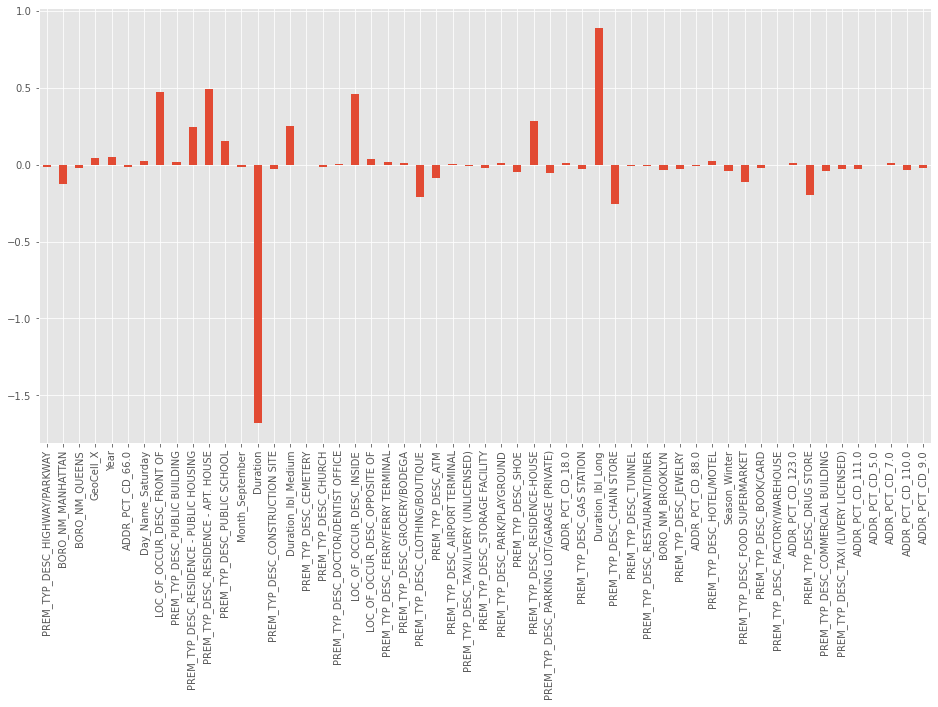

In [72]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=X_sm.columns)
weights.plot(kind='bar', figsize = (16,8))  #added figsize - trying to see if it expands the view
plt.show()

In [68]:
def getThreshold(y_test, probs, pos_label):
    probs = probs.T[1]
    actual = np.array([y_test == 'Violent Crime']).astype(int)[0]
    resultsdf = pd.DataFrame(data = {'Actual':actual, 'Probability':probs})
    tplist = []
    tnlist = []
    fplist = []
    fnlist = []
    threshlist = []
    for thresh in np.linspace(0,1,num=51):
        y_pred = probs > thresh
        tplist.append((resultsdf['Actual'] * y_pred).sum())
        tnlist.append(((1 - resultsdf['Actual']) * (1 - y_pred)).sum())
        fplist.append(((1 - resultsdf['Actual']) * y_pred).sum())
        fnlist.append((resultsdf['Actual'] * (1 - y_pred)).sum())
        threshlist.append(thresh)
    accdf = pd.DataFrame(data = {'Threshold':threshlist, 'TP':tplist, 'TN':tnlist, 'FP':fplist, 'FN':fnlist})
    accdf['Accuracy'] = (accdf['TP'] + accdf['TN']) / (accdf['TP'] + accdf['FP'] + accdf['TN'] + accdf['FN'])
    accdf['Precision'] = accdf['TP'] / (accdf['TP'] + accdf['FP'])
    accdf['Recall / Sensitivity'] = accdf['TP'] / (accdf['TP'] + accdf['FN'])
    accdf['Specificity'] = accdf['TN'] / (accdf['TN'] + accdf['TP'])
    accdf['F1'] = 2*((accdf['Precision'] * accdf['Recall / Sensitivity']) / (accdf['Precision'] + accdf['Recall / Sensitivity']))
    return accdf

In [69]:
accdf = getThreshold(y_hat, probs, pos_label = '0')
accdf

NameError: name 'probs' is not defined

### Interpretation

### ROC Curve and Thresholds

### Performance Metrics

In [73]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67     73206
           1       0.67      0.77      0.72     72928

    accuracy                           0.70    146134
   macro avg       0.70      0.70      0.69    146134
weighted avg       0.70      0.70      0.69    146134



# Model 2 - Random Forest Classification

### Model Description

We've developed a model using sklearn's Random Forest Classifier.  We followed the following steps in developing the model:

- balance the classes using SMOTE
- one hot encoded the categoricals
- scaled the continuous variables ensuring we scale the training set and then use the same scaler object to scale the test data and holdout data
- evaluated the important features looking at gini-importance and reduced the overall variables in the model
- performed a stratified kfold using 10 splits to ensure a stable accuracy measurement across all folds
- Then, we performed a Grid Search to determine the optimal hyperparameters with 3 folds for each of the 300 candidates resulting in 900 iterations
- using the hyperparmeters of the best estimator, we fit the final model
- then, we evaluated the thresholds and selected the best threshold that optimized precision, recall and accuracy
- then, we compared the performance against the hold out set so that we are comparing the two models against the same data


In [6]:
import altair as alt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

#grab the dataset to begin model development
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Training_and_Test_Set.csv"
df_Crime = pd.read_csv(crime_file)

hold_out_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Hold_Out_Set.csv"
df_holdout = pd.read_csv(hold_out_file)

In [7]:
#evaluate class imbalance
df_Crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [8]:
#set up our X and y variables
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['y']]

In [9]:
#first, let's balance the classes

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X_train
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violent in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of viloent",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-violent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of violent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  584782
Number of non-violent in oversampled data 292391
Number of viloent 292391
Proportion of non-violent data in oversampled data is  0.5
Proportion of violent data in oversampled data is  0.5


In [10]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#go ahead and split the data so we can scale data separately on training and then on test so we don't have leakage
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = os_data_X.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_test
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [11]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

In [12]:
#prep the hold out set
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

X_holdout = df_holdout[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y_holdout = df_holdout[['y']]

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X_holdout[columns_to_encode])

#concatenate processed columns back together for X_train
X_holdout = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X_holdout)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X_holdout = df1

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = X_holdout.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_holdout
scaled_columns = scaler.transform(X_holdout[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_holdout_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_holdout_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_holdout = df1

In [13]:
#columns to keep based on evaluating gini-importance from a prior run
cols = ['Duration','x0_HEALTH & HOSP CORP','x0_N.Y. POLICE DEPT','x1_MANHATTAN','x1_STATEN ISLAND','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BAR/NIGHT CLUB','x4_BEAUTY & NAIL SALON','x4_BUS (NYC TRANSIT)','x4_BUS (OTHER)','x4_BUS STOP','x4_BUS TERMINAL','x4_CANDY STORE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_COMMERCIAL BUILDING','x4_DEPARTMENT STORE','x4_DOCTOR/DENTIST OFFICE','x4_DRUG STORE','x4_FACTORY/WAREHOUSE','x4_FAST FOOD','x4_FERRY/FERRY TERMINAL','x4_FOOD SUPERMARKET','x4_GROCERY/BODEGA','x4_GYM/FITNESS FACILITY','x4_HOSPITAL','x4_HOTEL/MOTEL','x4_JEWELRY','x4_LIQUOR STORE','x4_OTHER','x4_PARK/PLAYGROUND','x4_PRIVATE/PAROCHIAL SCHOOL','x4_PUBLIC BUILDING','x4_PUBLIC SCHOOL','x4_RESIDENCE - APT. HOUSE','x4_RESIDENCE - PUBLIC HOUSING','x4_RESIDENCE-HOUSE','x4_RESTAURANT/DINER','x4_SHOE','x4_SOCIAL CLUB/POLICY','x4_STREET','x4_TELECOMM. STORE','x4_VARIETY STORE','x5_Saturday','x5_Sunday','x6_July','x6_May','x8_Summer','x9_Day']

X_train=X_train[cols]
y_train=y_train['y']

X_test = X_test[cols]
y_test=y_test['y']

X_holdout=X_holdout[cols]
y_holdout=y_holdout['y']

In [14]:
#perform 10 fold cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#split into training and test -- I skip here because I already have the data split above
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('Cross Validation Results: {}'.format(cv_results))

Cross Validation Results: [0.77260971 0.77925742 0.77626488 0.77081418 0.7778039  0.77559745
 0.77437903 0.77619597 0.77683725 0.77640973]


### Grid Search

In [15]:
#Set up the parameters for grid search
parameters = {'n_estimators' : (10,30,50,70,90),
              'criterion' : ('gini','entropy'),
              'max_depth' : (3,5,7,9,10),
              'max_features' : ('auto','sqrt'),
              'min_samples_split' : (2,4,6)
             }

In [16]:
#set up grid search object
clf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [17]:
clf_grid_model = clf_grid.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 51.0min finished


In [18]:
#identify optimal hyperparameters
clf_grid_model.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=90, n_jobs=-1)

In [19]:
#what is the best score for the optimal hyperpameters
clf_grid_model.best_score_

0.7664169301362911

In [20]:
#create a Random Forest Classifier object using the optimal hyperparameters
clf = RandomForestClassifier(bootstrap=True,
                             class_weight=None,
                             criterion= 'gini',
                             max_depth= 10,
                             max_features= 'sqrt',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             min_samples_leaf=1,
                             min_samples_split= 6,
                             min_weight_fraction_leaf=0.0,
                             n_estimators= 90,
                             n_jobs=-1,
                             oob_score=False,
                             random_state=0,
                             verbose=0,
                             warm_start=False
                            )

In [21]:
#train the random forest classifier using the optimal hyperparmeters
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=90, n_jobs=-1, random_state=0)

### Test the best model

In [22]:
y_pred = clf.predict(X_test)

In [23]:
#evaluate the accuracy of the Random Forest Classifier across training, test, and hold out set
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'Train Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Holdout Accuracy: {clf.score(X_holdout, y_holdout):.3f}')

Test Accuracy: 0.759
Train Accuracy: 0.759
Holdout Accuracy: 0.707


In [24]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     58478
           1       0.74      0.79      0.77     58479

    accuracy                           0.76    116957
   macro avg       0.76      0.76      0.76    116957
weighted avg       0.76      0.76      0.76    116957



In [25]:
#classification report on y_holdout
y_pred_holdout = clf.predict(X_holdout)
print(classification_report(y_holdout,y_pred_holdout))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78     40568
           1       0.52      0.65      0.58     18196

    accuracy                           0.71     58764
   macro avg       0.67      0.69      0.68     58764
weighted avg       0.73      0.71      0.71     58764



### Feature Importance

In [26]:
#get feature importance
import altair as alt

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
df_top_features = importances
df_top_features['feature'] = df_top_features.index

alt.Chart(df_top_features).mark_bar().encode(
    x=alt.Y('feature:N',sort='-y'),
    y='Gini-importance:Q',
    tooltip=['feature','Gini-importance']
).properties(title="Feature Importance")

alt.Chart(...)

### Parameters

### Interpretation

### ROC Curve and Thresholds

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

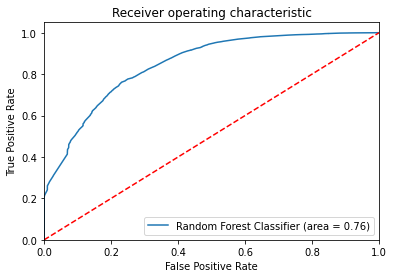

In [28]:
#plot out ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [29]:
def getThreshold(y_test, probs, pos_label):
    probs = probs.T[1]
    actual = np.array([y_test == pos_label]).astype(int)[0]
    resultsdf = pd.DataFrame(data = {'Actual':actual, 'Probability':probs})
    tplist = []
    tnlist = []
    fplist = []
    fnlist = []
    threshlist = []
    for thresh in np.linspace(0,1,num=51):
        y_pred = probs > thresh
        tplist.append((resultsdf['Actual'] * y_pred).sum())
        tnlist.append(((1 - resultsdf['Actual']) * (1 - y_pred)).sum())
        fplist.append(((1 - resultsdf['Actual']) * y_pred).sum())
        fnlist.append((resultsdf['Actual'] * (1 - y_pred)).sum())
        threshlist.append(thresh)
    accdf = pd.DataFrame(data = {'Threshold':threshlist, 'TP':tplist, 'TN':tnlist, 'FP':fplist, 'FN':fnlist})
    accdf['Accuracy'] = (accdf['TP'] + accdf['TN']) / (accdf['TP'] + accdf['FP'] + accdf['TN'] + accdf['FN'])
    accdf['Precision'] = accdf['TP'] / (accdf['TP'] + accdf['FP'])
    accdf['Recall / Sensitivity'] = accdf['TP'] / (accdf['TP'] + accdf['FN'])
    accdf['Specificity'] = accdf['TN'] / (accdf['TN'] + accdf['TP'])
    accdf['F1'] = 2*((accdf['Precision'] * accdf['Recall / Sensitivity']) / (accdf['Precision'] + accdf['Recall / Sensitivity']))
    return accdf

In [30]:
accdf = getThreshold(y_test,clf.predict_proba(X_test),pos_label=1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
1,0.02,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
2,0.04,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
3,0.06,58479,2,58476,0,0.500021,0.500013,1.000000,0.000034,0.666678
4,0.08,58478,355,58123,1,0.503031,0.501522,0.999983,0.006034,0.668015
5,0.10,58469,718,57760,10,0.506058,0.503050,0.999829,0.012131,0.669334
6,0.12,58366,6949,51529,113,0.558453,0.531107,0.998068,0.106392,0.693290
7,0.14,58297,8151,50327,182,0.568140,0.536686,0.996888,0.122667,0.697737
8,0.16,58144,10170,48308,335,0.584095,0.546199,0.994271,0.148871,0.705071
9,0.18,58002,12470,46008,477,0.602546,0.557658,0.991843,0.176950,0.713919


In [31]:
#.58 threshold has highest precision and accuracy
proba = clf.predict_proba(X_test)
test_threshold_predict = np.where(proba[:,1] > .58,1,0)

In [32]:
holdout_accdf = getThreshold(y_holdout,clf.predict_proba(X_holdout),pos_label=1)
holdout_accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
1,0.02,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
2,0.04,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
3,0.06,18196,1,40567,0,0.309662,0.309651,1.000000,0.000055,0.472875
4,0.08,18193,265,40303,3,0.314104,0.311013,0.999835,0.014357,0.474443
5,0.10,18186,541,40027,10,0.318682,0.312404,0.999450,0.028889,0.476017
6,0.12,18111,4813,35755,85,0.390103,0.336223,0.995329,0.209955,0.502650
7,0.14,18066,5607,34961,130,0.402849,0.340694,0.992856,0.236852,0.507308
8,0.16,17990,6963,33605,206,0.424631,0.348677,0.988679,0.279045,0.515539
9,0.18,17906,8524,32044,290,0.449765,0.358478,0.984062,0.322512,0.525519


In [33]:
#plot out the optimal threshold on the holdout set
source = holdout_accdf
source['opt'] = .56

base = alt.Chart(source)

#red
acc= base.mark_line(color="#fc030f").encode(
    x='Threshold:Q',
    y='Accuracy:Q'
)
#green
prec = base.mark_line(color="#136e1a").encode(
    x='Threshold:Q',
    y='Precision:Q'
)
#blue
rec = base.mark_line(color="#3a3b9c").encode(
    x='Threshold:Q',
    y='Recall / Sensitivity:Q'
)
#orange
spec = base.mark_line(color="#ebac00").encode(
    x='Threshold:Q',
    y='Specificity:Q'
)

optimal = base.mark_rule().encode(
    x='opt'
)
acc+prec+rec+spec+optimal

alt.LayerChart(...)

In [35]:
#.54 threshold has highest precision, recall and accuracy
proba = clf.predict_proba(X_holdout)
holdout_threshold_predict = np.where(proba[:,1] > 0.56,1,0)
holdout_threshold_predict

array([0, 0, 1, ..., 0, 0, 0])

### Performance Metrics

In [36]:
#classification report on y_test using optimal thresholds
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,test_threshold_predict))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     58478
           1       0.79      0.69      0.74     58479

    accuracy                           0.75    116957
   macro avg       0.76      0.75      0.75    116957
weighted avg       0.76      0.75      0.75    116957



In [37]:
#classification report on y_holdout
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_holdout,holdout_threshold_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     40568
           1       0.56      0.55      0.55     18196

    accuracy                           0.73     58764
   macro avg       0.68      0.68      0.68     58764
weighted avg       0.72      0.73      0.73     58764



# Model Validation

### Model 1, Logistic Regression - Pros and Cons

#### Holdout Testing

In [47]:
#test model against the holdout set
holdout = pd.read_csv('Hold_Out_Set.csv')

In [48]:
#check for nulls
holdout.isnull().values.any()

False

In [49]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(holdout.JURIS_DESC,prefix='JURIS_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.BORO_NM,prefix='BORO_NM')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Day_Name,prefix='Day_Name')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Month,prefix='Month')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Duration_lbl,prefix='Duration_lbl')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Season,prefix='Season')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Daytime,prefix='Daytime')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

In [50]:
#Now we drop the original variables
if 'JURIS_DESC' in holdout:    
    del holdout['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in holdout:    
    del holdout['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in holdout:    
    del holdout['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in holdout:    
    del holdout['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in holdout:    
    del holdout['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in holdout:    
    del holdout['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in holdout:    
    del holdout['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in holdout:    
    del holdout['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in holdout:    
    del holdout['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in holdout:    
    del holdout['Daytime'] # get rid of the original category as it is now one-hot encoded

In [51]:
#Now I want to pare down the variables - replicating the original adjustment cutting off at  |.03|%
holdout = holdout[[ 'PREM_TYP_DESC_HIGHWAY/PARKWAY', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'GeoCell_X', 'Year',
          'ADDR_PCT_CD_66.0', 'Day_Name_Saturday', 'LOC_OF_OCCUR_DESC_FRONT OF', 'PREM_TYP_DESC_PUBLIC BUILDING', 
          'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 
          'PREM_TYP_DESC_PUBLIC SCHOOL', 'Month_September', 'Duration', 'PREM_TYP_DESC_CONSTRUCTION SITE',
          'Duration_lbl_Medium', 'PREM_TYP_DESC_CEMETERY', 'PREM_TYP_DESC_CHURCH', 'PREM_TYP_DESC_DOCTOR/DENTIST OFFICE',
          'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'PREM_TYP_DESC_FERRY/FERRY TERMINAL',
          'PREM_TYP_DESC_GROCERY/BODEGA', 'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_ATM', 'PREM_TYP_DESC_AIRPORT TERMINAL',  'PREM_TYP_DESC_TAXI/LIVERY (UNLICENSED)',  'PREM_TYP_DESC_STORAGE FACILITY', 
          'PREM_TYP_DESC_PARK/PLAYGROUND', 'PREM_TYP_DESC_SHOE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 
          'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 'ADDR_PCT_CD_18.0', 'PREM_TYP_DESC_GAS STATION',
          'Duration_lbl_Long', 'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_TUNNEL', 'PREM_TYP_DESC_RESTAURANT/DINER',          'BORO_NM_BROOKLYN',  'PREM_TYP_DESC_JEWELRY',  'ADDR_PCT_CD_88.0',  'PREM_TYP_DESC_HOTEL/MOTEL', 
          'Season_Winter', 'PREM_TYP_DESC_FOOD SUPERMARKET', 'PREM_TYP_DESC_BOOK/CARD', 'PREM_TYP_DESC_FACTORY/WAREHOUSE',          'ADDR_PCT_CD_123.0',  'PREM_TYP_DESC_DRUG STORE',  'PREM_TYP_DESC_COMMERCIAL BUILDING', 
          'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'ADDR_PCT_CD_111.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_7.0', 
          'ADDR_PCT_CD_110.0', 'ADDR_PCT_CD_9.0','y']]

In [52]:
holdout.head()

,PREM_TYP_DESC_HIGHWAY/PARKWAY,BORO_NM_MANHATTAN,BORO_NM_QUEENS,GeoCell_X,Year,ADDR_PCT_CD_66.0,Day_Name_Saturday,LOC_OF_OCCUR_DESC_FRONT OF,PREM_TYP_DESC_PUBLIC BUILDING,PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING,...,ADDR_PCT_CD_123.0,PREM_TYP_DESC_DRUG STORE,PREM_TYP_DESC_COMMERCIAL BUILDING,PREM_TYP_DESC_TAXI (LIVERY LICENSED),ADDR_PCT_CD_111.0,ADDR_PCT_CD_5.0,ADDR_PCT_CD_7.0,ADDR_PCT_CD_110.0,ADDR_PCT_CD_9.0,y
0,0,0,0,7.0,2015.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,6.0,2014.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,6.0,2014.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,9.0,2014.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,8.0,2014.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in holdout:
    y = holdout['y'].values # get the labels we want
    del holdout['y'] # get rid of the class label
    X = holdout.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn

In [74]:
from sklearn.preprocessing import StandardScaler

#scl_obj = StandardScaler()

holdout_test_scaled = scl_obj.transform(X) # apply those means and std to the test set (without snooping at the test set values)

y_holdout_hat = lr_clf.predict(holdout_test_scaled) # get test set precitions

acc = mt.accuracy_score(y,y_holdout_hat)
conf = mt.confusion_matrix(y,y_holdout_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.6703764209379892
[[25452 15116]
 [ 4254 13942]]


In [75]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y,y_holdout_hat))

              precision    recall  f1-score   support

           0       0.86      0.63      0.72     40568
           1       0.48      0.77      0.59     18196

    accuracy                           0.67     58764
   macro avg       0.67      0.70      0.66     58764
weighted avg       0.74      0.67      0.68     58764



We compared the test, training and holdout variable metrics to evaluation overall model performance

|Metric|Training/Test Set|Holdout Set|
|---|:-:|:-:|
|Accuracy|70%|67%|
|Precision|70%|67%|
Recall|70%|70%|

### Model 2, Random Forest - Pros and Cons